[View in Colaboratory](https://colab.research.google.com/github/gauravsingh1012/AI-Adventures-3/blob/master/Stocks%20Prediction.ipynb)

# Stock Prediction using Stocker

Stocker ("stock explorer") is a Python-based toolkit for stock analysis and prediction. It is built on the quandl library for financial data, the prophet library from Facebook for additive models, numpy and pandas for data manipulation, and matplotlib for visualization. 

This notebook will document some of the basic capabilities of Stocker for prediction. First, I have to recommend against playing the stock market on a daily basis, with or without Stocker! Primarily I developed this tool to gain more experience with time series analysis and object-oriented programming. To see the code for Stocker, check out stocker.py and to see a notebook with analysis examples, look at the [Stocker Analysis Usage notebook](https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb). 

In [1]:
!pip install quandl
!pip install fbprophet
!pip install pytrends

In [2]:

import os

os.chdir('/content')

!rm -rf AI-Adventures-*
!git clone https://github.com/gauravsingh1012/AI-Adventures-3.git

os.chdir('/content/AI-Adventures-3')
!pwd

Cloning into 'AI-Adventures-3'...
remote: Counting objects: 173, done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 173 (delta 8), reused 11 (delta 4), pack-reused 158
Receiving objects: 100% (173/173), 4.40 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (96/96), done.
/content/AI-Adventures-3


## Import the Stocker Class

In [0]:
from stocksAnalyzerBackend import stockTicker

### Instantiate a Stocker object 

We will be looking at Amazon stock data throughout this example. To retrieve the data, we pass the ticker to the stocker class and assign it to a variable. 

In [0]:
from IPython.display import clear_output
ticker = stockTicker('INFY','NSE')
clear_output()

The Stocker object has a number of attributes and methods we can use for analysis and prediction. The main methods we will use in this notebook are `Stocker.create_prophet_model(), Stocker.changepoint_prior_analysis(), Stocker.changepoint_prior_validation(), Stocker.evaluate_prediction(),` and `Stocker.predict_future()`.

The most critical attributes for a forecast are `Stocker.changepoint_prior_scale, Stocker.training_years`, and the seasonalities included in the model. 

### Basic Plot of Stock History

Let's see what History looks like in its entirety.

In [0]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

Maximum Adj. Close = 4365.90 on 2014-11-27.
Minimum Adj. Close = 873.40 on 2017-08-21.
Current Adj. Close = 1360.65 on 2018-08-06.



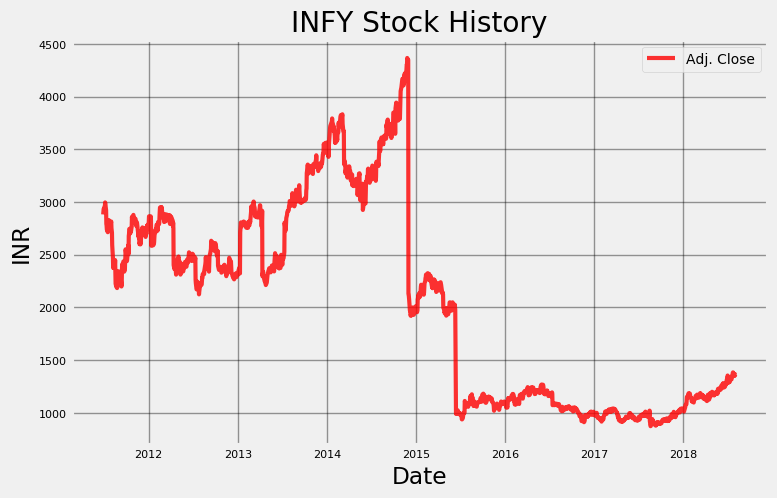

In [6]:
ticker.plot_stock()

Looks predictable right?  

### Plot of Daily Changes

Maximum Daily Change = 228.65 on 2014-10-10.
Minimum Daily Change = -328.40 on 2013-04-12.
Current Daily Change = -5.40 on 2018-08-06.



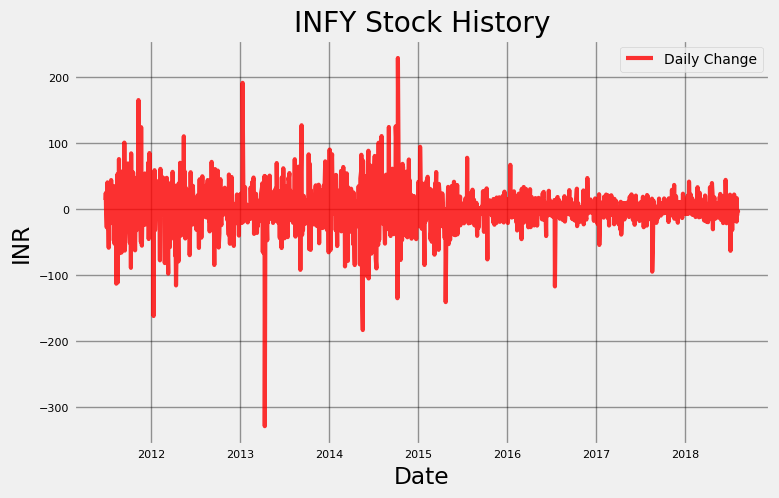

In [7]:
ticker.plot_stock(stats=['Daily Change'])

There have been some extreme changes in absolute magnitude recently, but these are not as large as they seem because the price of the stock has increased. We could change the plot to have percentage change on the y-axis. There do not appear to be trends with regards to the changes in one direction or the other. However, we know the stock has increased in value, so the overall average daily change must be slightly positive. 

## Examine Trends/Patterns

We can create a basic model (with no predictions) trained on the past 3 years of data to inspect any trends and patterns in the data. 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


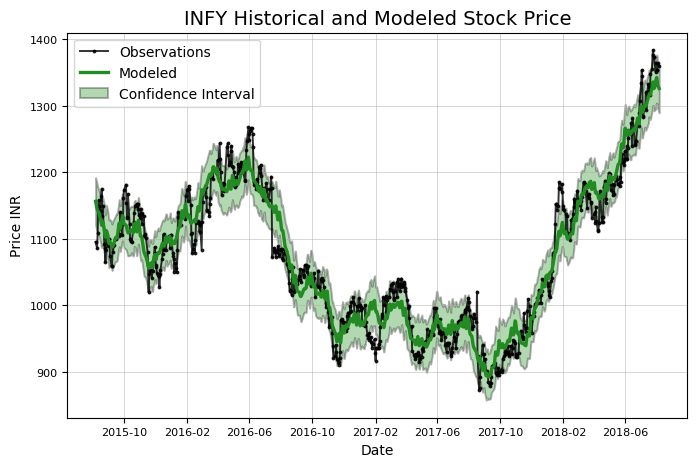

In [8]:
model, model_data = ticker.create_prophet_model()

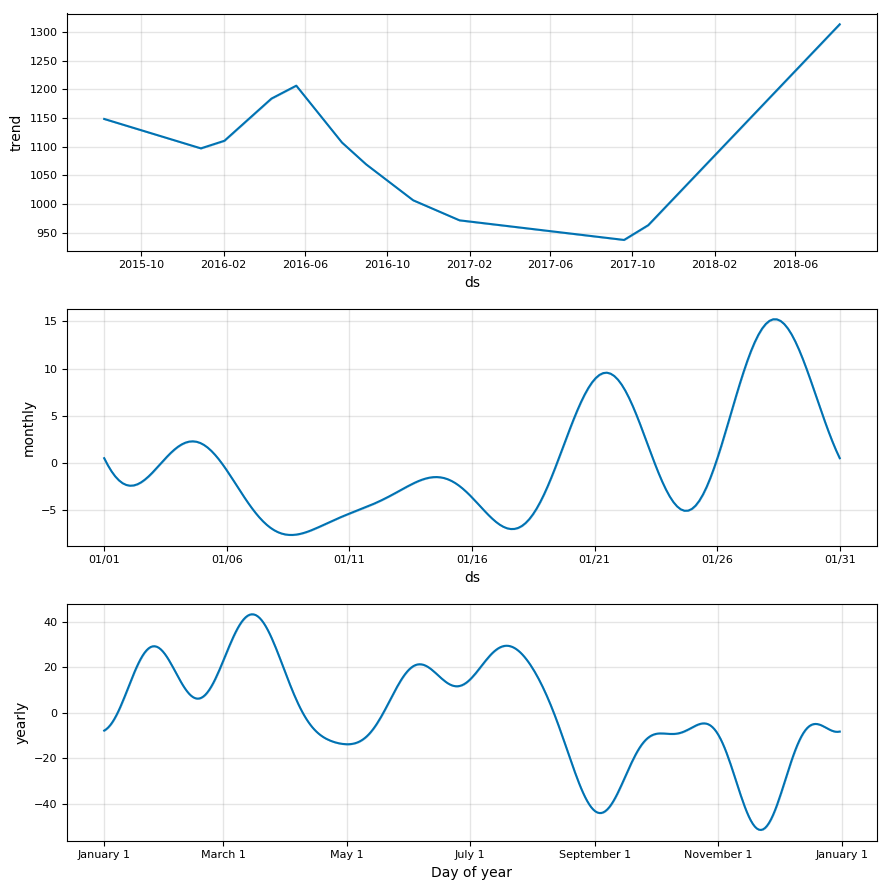

In [9]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

### Test Addition of a Weekly Seasonality

Although it is unlikely, there might be a significant weekly component which would improve the model. Let's add it in and look at the pattern. 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


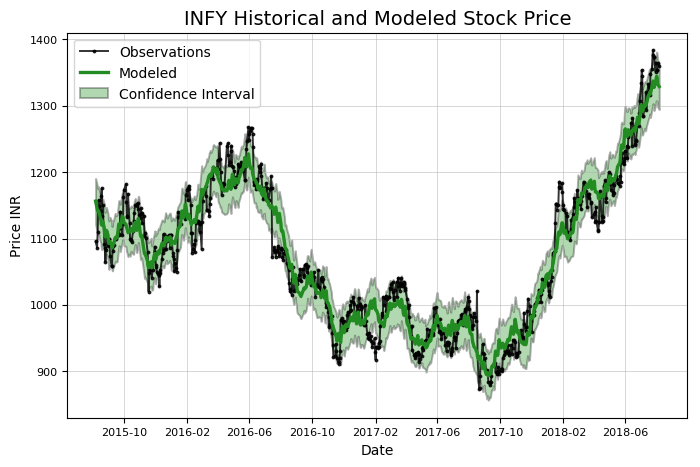

In [10]:
ticker.weekly_seasonality=True
model, model_data = ticker.create_prophet_model()

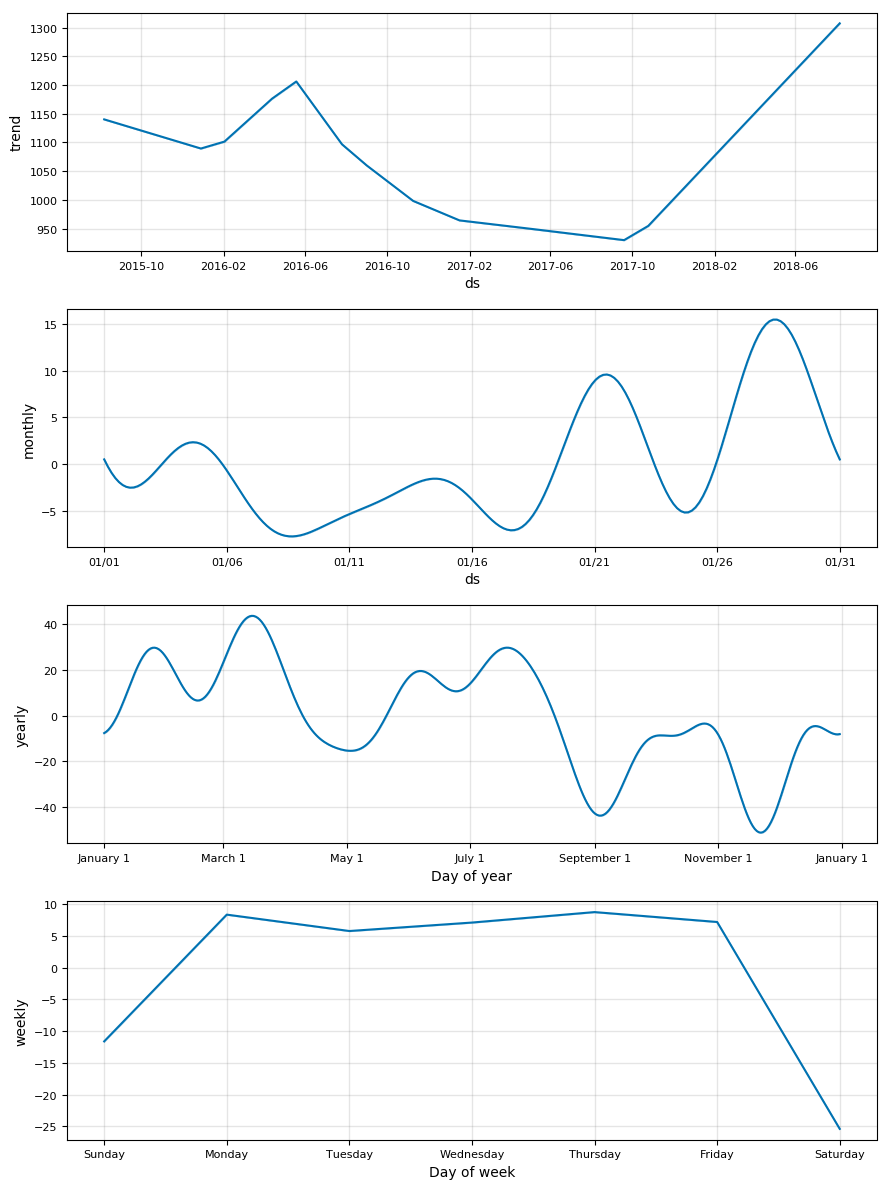

In [11]:
model.plot_components(model_data)
plt.show()

Maybe there is a slight weekly pattern? For now, we can remove that seasonality and then evaluate models with and without it to see the effect on predictions.

In [0]:
ticker.weekly_seasonality=False

# First Predictions

We can make a prediction for any number of specified days using the create model method. The prediction also includes the uncertainty interval, a necessity when making estimates about the future! 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predicted Price on 2018-11-04 = INR1407.37


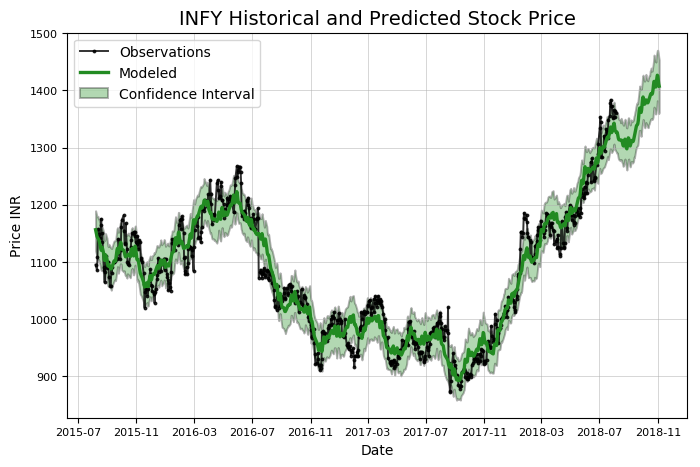

In [13]:
model, model_data = ticker.create_prophet_model(days=90)

The model predicts a continuous increase in price. Notice how the model for both the past data and the future data is smoother than the actual observations. The model smooths out the noise on the small scale in order to make more accurate general predictions over a long period. In other words, an additive model will be more accurate at capturing general movements rather than specific daily fluctuations. 

# Evaluate Model

Anyone can make stock predictions by simply picking a number. For our predictions to be meaningful, we must evaluate them on real data. 

One way to do this is set aside some historical data as a test set and use data from further back as our training set. In the default evaluation method, we test using the past year and train on the 3 years prior to the test period. 

To quantify the accuracy of our predictions, we can find the average dollar error on both the testing and training data, the percentage the actual price was in the predicted confidence interval, and the percentage of times we predicted the correct direction for the stock. 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Prediction Range: 2017-08-06 to 2018-08-06.

Predicted price on 2018-08-04 = INR668.38.
Actual price on    2018-08-03 = INR1364.10.

Average Absolute Error on Training Data = INR166.71.
Average Absolute Error on Testing  Data = INR306.79.

When the model predicted an increase, the price increased 59.66% of the time.
When the model predicted a  decrease, the price decreased  47.29% of the time.

The actual value was within the 80% confidence interval 66.67% of the time.


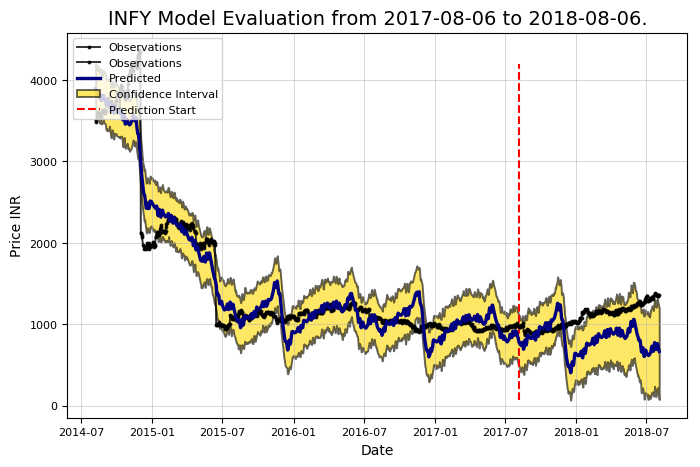

In [14]:
ticker.evaluate_prediction()

These predictions are not very good! However, it is likely that the model hyperparameters (settings) are not optimized for our problem. There are a number of these knobs we can adjust to improve the model, with perhaps the most important the changepoint prior scale, or the amount of weight the model assigns to shifts in the data.

# Changepoint Prior Scale Selection

Changepoints represent where a time series goes from increasing to decreasing or from increasing slowly to increasingly rapidly. They occur at the places with the [greatest change in the rate of the time series](https://facebook.github.io/prophet/docs/trend_changepoints.html). 

The changepoint prior scale represents the amount of weight given to the changepoints in the model. This can be used to control overfitting vs underfitting. A higher prior will create a model with more flexibility and more emphasis on the changepoints. This can lead to overfitting because the model will closely follow the training data. Lowering the prior decreases the model flexibility which can cause the opposite problem underfitting. This occurs when our model does not follow the training data closely enough and fails to learn the underlying relationships.

The Stocker class contains two different ways to choose an appropriate prior: grahically and quantitatively with validation data.

## Graphical Comparison

We will start with a range of four priors to compare. First, we can graphically compare them to get an intuition of how the priors affect the model.  

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


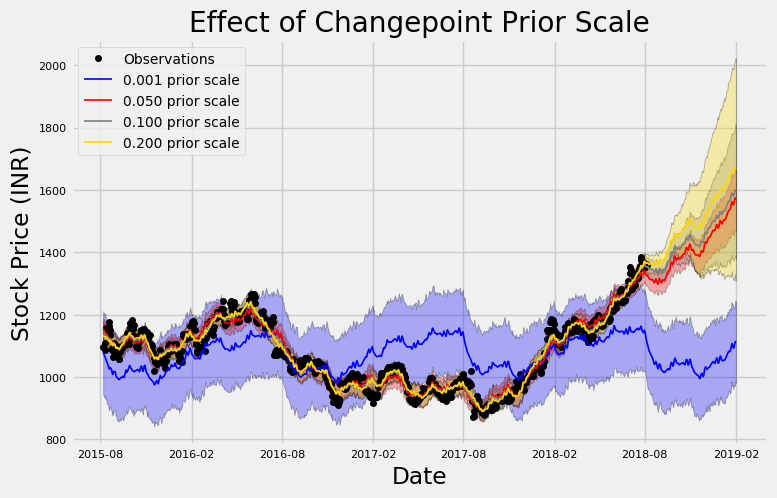

In [15]:
ticker.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

## Quantitative Comparison

This gives us an idea of how well each prior fits the training data, but no numbers to back up our intuitions. The changepoint prior validation method is designed to provide numerical backing. We are testing from 2017-01-18 to 2018-01-18, so we need to make sure to use a different validation range. We will select two years prior to the testing date range. The model will be trained on the three years prior to the validation period.


Validation Range 2016-01-04 to 2017-01-03.



/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


     cps   train_err  train_range     test_err   test_range
0  0.001  605.387259  1846.704441   701.782081  1848.239465
1  0.050  222.884113   728.445529  1430.195513   945.825647
2  0.100  152.740114   549.120145  1512.916239  2504.989696
3  0.200  118.199928   468.392349  1326.835542  4257.264836


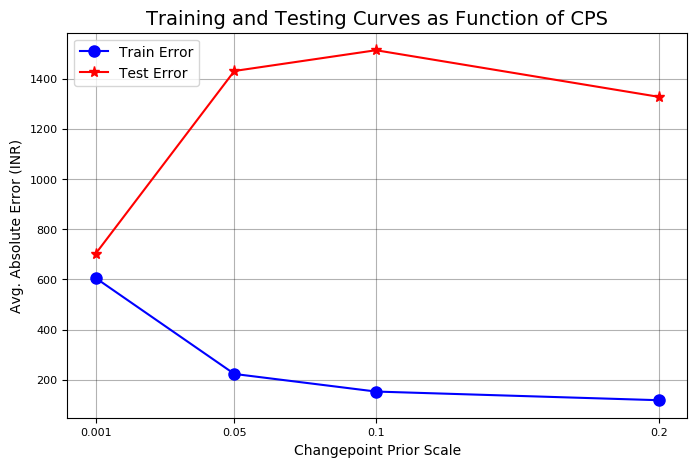

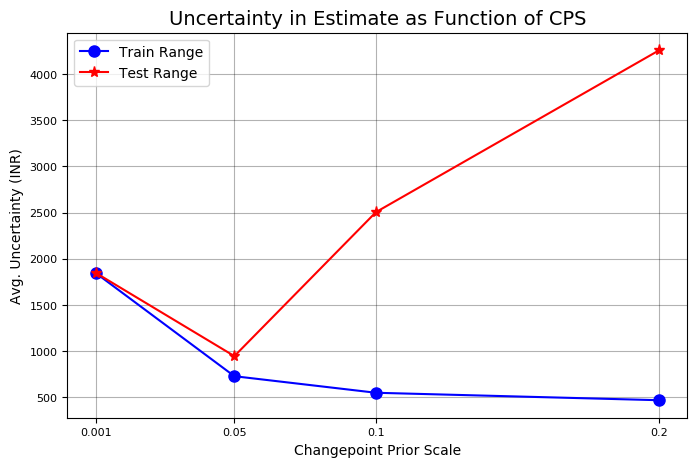

In [16]:
ticker.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

The test error decreases as we increase the prior. Stocks change considerably on a day to day basis, and a more flexible model can account for these fluctuations.

### Refine Search 

We can evaluate additional changepoint prior scales to determine the best fit for our data. 


Validation Range 2016-01-04 to 2017-01-03.



/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


    cps   train_err  train_range     test_err   test_range
0  0.15  128.204080   488.146665  1371.984627  3770.689432
1  0.20  118.199928   467.755634  1326.835542  4354.401942
2  0.25  115.002398   458.116476  1196.245077  4701.913346
3  0.40  111.630178   449.798527   936.349954  5253.974441
4  0.50  108.806800   444.798285   925.823563  5670.286565
5  0.60  106.864274   439.380177   892.554966  6478.012882


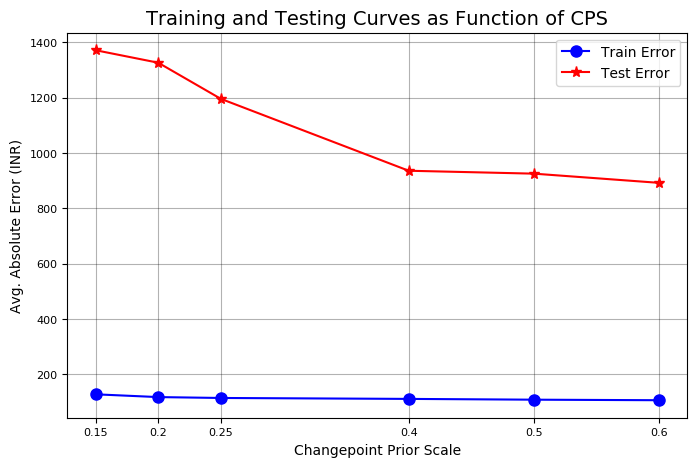

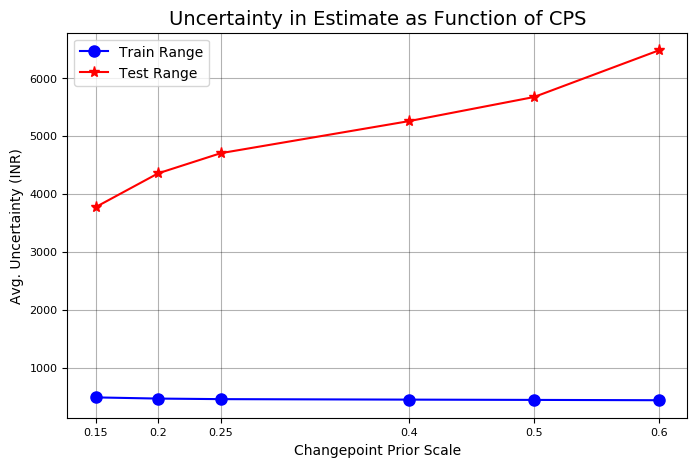

In [17]:
ticker.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

We now assign the changepoint prior with the smallest error on the testing set to the Stocker object. The prior is one of the attiributes and we can change it like any other variable. At this point, we could also change the seasonalities or the amount of training data to achieve the best performance on the testing data

In [0]:
ticker.changepoint_prior_scale = 0.4

### Evaluate Improved Model

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Prediction Range: 2017-08-06 to 2018-08-06.

Predicted price on 2018-08-04 = INR1570.39.
Actual price on    2018-08-03 = INR1364.10.

Average Absolute Error on Training Data = INR85.65.
Average Absolute Error on Testing  Data = INR370.60.

When the model predicted an increase, the price increased 59.69% of the time.
When the model predicted a  decrease, the price decreased  47.90% of the time.

The actual value was within the 80% confidence interval 82.73% of the time.


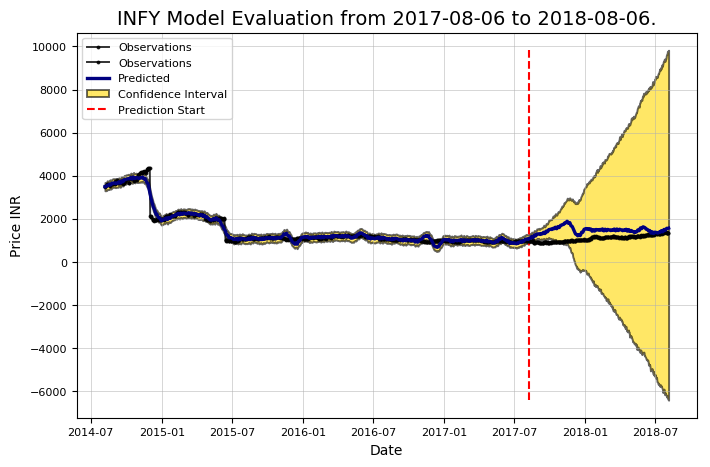

In [19]:
ticker.evaluate_prediction()

#### Add in weekly seasonality and evaluate

In [0]:
ticker.weekly_seasonality=True

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Prediction Range: 2017-08-06 to 2018-08-06.

Predicted price on 2018-08-04 = INR1669.25.
Actual price on    2018-08-03 = INR1364.10.

Average Absolute Error on Training Data = INR85.71.
Average Absolute Error on Testing  Data = INR415.93.

When the model predicted an increase, the price increased 58.52% of the time.
When the model predicted a  decrease, the price decreased  46.90% of the time.

The actual value was within the 80% confidence interval 81.12% of the time.


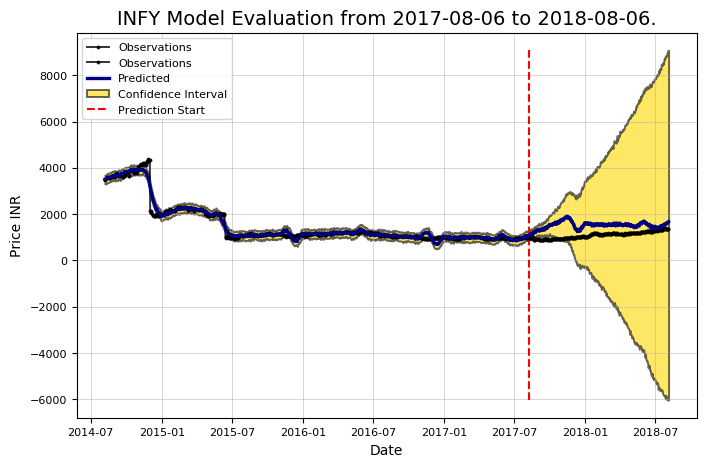

In [21]:
ticker.evaluate_prediction()

The best changepoint prior scale for our model is 0.5 and including the weekly seasonality did not improve the model. Therefore, we will change these settings accordingly. 

In [0]:
ticker.changepoint_prior_scale=0.5
ticker.weekly_seasonality=True

## Play the Daily Market

For fun (this should never be done for real) we can "play" the market with our predictions. We will compare our model with the simple strategy of buying and holding over the same time period. The rules of our game are straightforward:

1. If we predict the price will increase, we buy stock on that day. If we predict a decrease, we do not play the market.
2. If we predicted an increase and the stock does increase, we recieve the change in price of the stock over that day times the number of shares.
3. If we predicted an increase and the stock decreases, we lose the change in price of the stock over that day times the number of shares.

We are assuming the "change in price of a share on that day" is the difference between the previous days' closing price and the closing price on our day. For example, if the closing price on Monday was 14 and the closing price on Tuesday was 18, we would call that a 4 change on Tuesday. This is not entirely accurate as stocks prices change a small amount overnight, but it will be acceptable for our game. Now, let's play with the defaults.

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/content/AI-Adventures-3/stocksAnalyzerBackend.py:616: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in INFY from 2017-08-06 to 2018-08-06 with 1000 shares.

When the model predicted an increase, the price increased 58.14% of the time.
When the model predicted a  decrease, the price decreased  46.22% of the time.

The total profit using the Prophet model = INR267050.00.
The Buy and Hold strategy profit =         INR395850.00.

Thanks for playing the stock market!



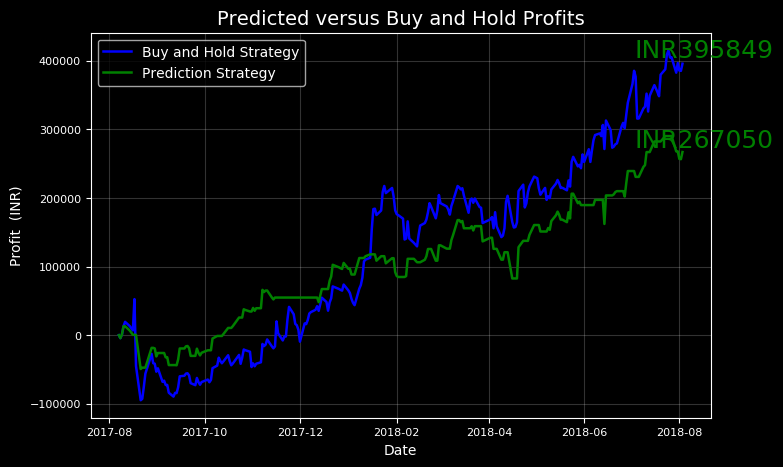

In [23]:
ticker.evaluate_prediction(nshares=1000)

Notice that our profits do not depend on the difference between the final predicted price and the actual price, only on the percentage of the time we correctly predicted the direction. We could alter the rules of the game to play it based on predicted values, but for now we can leave it at the rather simple exercise shown here. 

#### Try a Different Period

We can evaluate any time period we like to see if there are times when we beat the buy and hold strategy. More likely is that we will find times when we lose money. Nonetheless, it is important to test over different time frames to see how robust the model is to training data.

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/content/AI-Adventures-3/stocksAnalyzerBackend.py:616: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in INFY from 2012-01-03 to 2013-01-05 with 1000 shares.

When the model predicted an increase, the price increased 45.24% of the time.
When the model predicted a  decrease, the price decreased  43.55% of the time.

The total profit using the Prophet model = INR-195650.00.
The Buy and Hold strategy profit =         INR-555450.00.

Thanks for playing the stock market!



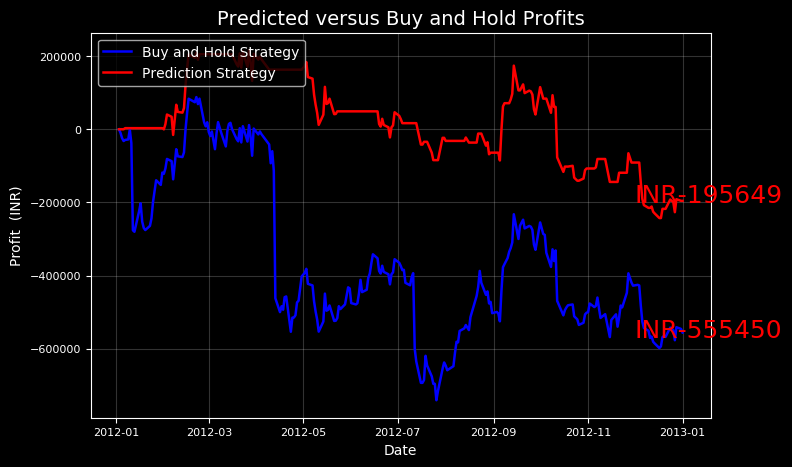

In [25]:
ticker.evaluate_prediction(start_date = '2012-01-03', end_date = '2013-01-05', nshares=1000)

# Predict the Future

As a last step, we can predict any number of days into the future. This function automatically trains on the past 3 years and makes predictions with the uncertainty intervals. 

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Predicted Increase: 

         Date     estimate     change        upper        lower
7  2018-08-13  1364.761485  12.016074  1391.694380  1337.735737
10 2018-08-16  1362.359858   0.829724  1390.144975  1335.609013

Predicted Decrease: 

        Date     estimate    change        upper        lower
1 2018-08-07  1365.305598 -1.275962  1391.251503  1341.053014
2 2018-08-08  1364.105700 -1.199898  1390.851423  1337.290833
3 2018-08-09  1363.074610 -1.031090  1390.148845  1336.856529
4 2018-08-10  1360.654947 -2.419663  1385.860327  1333.270439
6 2018-08-12  1352.745412 -7.909535  1380.011109  1325.988168
8 2018-08-14  1362.593071 -2.168414  1390.329531  1334.430931
9 2018-08-15  1361.530134 -1.062937  1386.737736  1336.478650


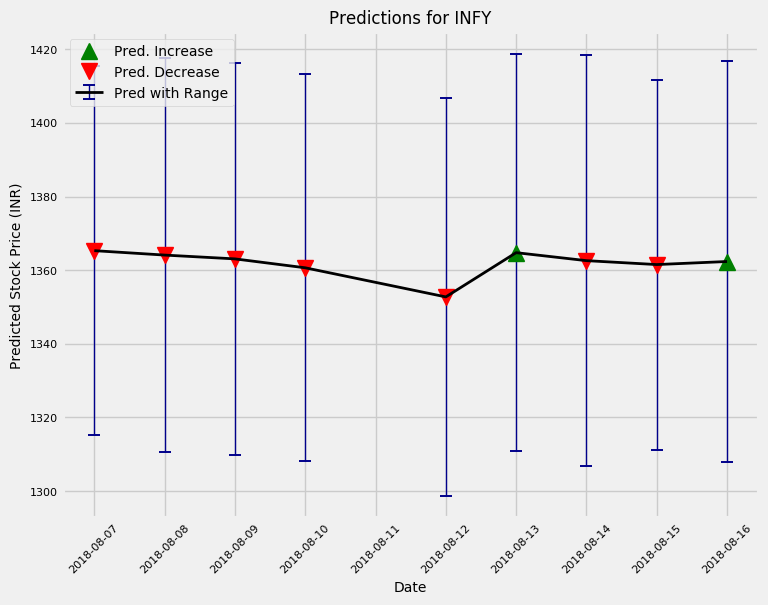

In [26]:
ticker.predict_future(days=10)

/usr/local/lib/python3.6/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Predicted Increase: 

         Date     estimate     change        upper        lower
7  2018-08-13  1364.761485  12.016074  1390.819190  1338.877052
10 2018-08-16  1362.359858   0.829724  1388.803297  1334.821688
14 2018-08-20  1362.214921   9.527092  1391.104958  1332.791911
16 2018-08-22  1361.134786   1.548790  1390.704987  1328.313240
17 2018-08-23  1366.073800   4.939015  1395.714369  1336.344390
18 2018-08-24  1368.537664   2.463863  1399.679651  1333.946108
21 2018-08-27  1363.124470   7.123397  1395.204523  1328.689466
23 2018-08-29  1363.947316   3.579816  1399.349248  1329.492440
24 2018-08-30  1371.367864   7.420549  1406.136882  1331.077565
25 2018-08-31  1375.318509   3.950645  1411.248882  1335.579805
28 2018-09-03  1372.825032   8.656862  1410.954223  1329.007245
30 2018-09-05  1374.238951   2.911388  1415.153487  1327.112741
31 2018-09-06  1378.638031   4.399080  1421.327282  1333.722541
32 2018-09-07  1378.973337   0.335306  1423.203035  1330.359962
35 2018-09-10  13

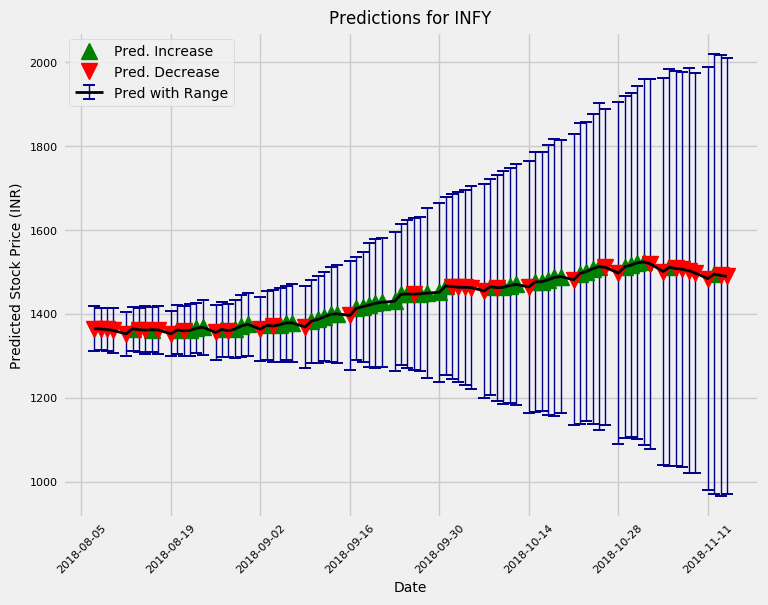

In [27]:
ticker.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 